In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
plt.style.use('fivethirtyeight')

# Creating a pin constraint

In this notebook, you create a general method to constrain two bodies via one pin. Your goal is to create a method that can be reused in different dynamic analyses. 

## Defining constraints $\mathbf{C}(\mathbf{q},~t)$

A kinematic constraint is a function that defines how the geometry of motion is defined in dynamics. You are limiting your analysis to planar motion, so we have already set some kinematic constraints on rigid bodies, 

### Planar motion constraints

A rigid body has six degrees of freedom. One choice of generalized
coordinates is the position of the center of mass, $\mathbf{r}_G =
R_x\hat{i}+R_y\hat{j}+R_z\hat{k}$, and the roll, yaw, and pitch of the object,
$\psi,~\phi,~and~\theta$, respectively. The generalized coordinates are
as such

$\mathbf{q} =\left[R_x,~R_y,~R_z,~\psi,~\phi,~\theta\right]$.

In planar motion, you create 3 _constraints_:

1. $R_z=cst$
2. $\psi=cst$
3. $\phi=cst$

If you wanted to write these as a set of constraint equations, you have 
$\mathbf{C}(\mathbf{q},~t)= 
\mathbf{0} = 
\left[\begin{array}
~R_z-cst\\
\psi-cst\\
\phi-cst\end{array}\right]$

Since these constraints do not affect the motion of a planar system, it is common practice to reduce the degrees of freedom to just 

$\mathbf{q} =\left[R_x,~R_y,\theta\right]$.

### General pin constraint 

![Two bodies constrained by a pin](../images/general-pin.svg)

Now, you have identified 3 degrees of freedom. Your constraints will take the form $\mathbf{C}(\mathbf{q},~t)= \mathbf{0}$. Consider 2 bodies that have center of mass positions, $\mathbf{R}^1$ and $\mathbf{R}^2$. Each body has a coordinate system with origin at $\mathbf{R}^i$. The transformation from the body coordinate system, $X^i-Y^i$, to the global, $X-Y$, is accomplished by rotating about the z axis as such,

$\mathbf{u}_P = \mathbf{A}^i\mathbf{u}_P^i$

where

$\mathbf{A}^i = \left[ \begin{array}{cc}
\cos \theta^i & -\sin \theta^i \\
\sin \theta^i & \cos \theta^i \\
\end{array} \right]$
and 
$\mathbf{u}_P^i=\left[\begin{array}{c} 
\bar{x}^{i}_{P} \\ 
\bar{y}^{i}_{P}\end{array}\right]$

$\mathbf{u}_{P}$ is the location of a point $P$ within body $i$. 

A pin constrains point $P$, location of a pin, to be equal in both body 1 and 2. The relative position of the pin with respect to each origin is constant as such, 

$\mathbf{R}_P = \mathbf{R}^1+\mathbf{R}_{P/O^1} = \mathbf{R}^2+\mathbf{R}_{P/O^2}$.

Rewriting this equation in terms of $\mathbf{A}$ and local body coordinate systems, you have

$\mathbf{C}_{pin}(\mathbf{q},~t)=\mathbf{0} = \mathbf{R}^1 + \mathbf{A}^1\left[\begin{array}{c} 
\bar{x}^{1}_{P} \\ 
\bar{y}^{1}_{P}\end{array}\right] - 
\mathbf{R}^2 -
\mathbf{A}^2\left[\begin{array}{c} 
\bar{x}^{2}_{P} \\ 
\bar{y}^{2}_{P}\end{array}\right]$

This equation describes the constraints in a general planar system that has two bodies pinned together. 

## A link pinned to the ground

![Link pinned to ground at (xA, 0)](../images/ground-pin.svg)

Consider a link that is pinned to point $A$ located at $\mathbf{r}_A = x_A\hat{i}$. The ground is fixed to $\theta^{ground}=0$, and the position of the pin, $x_p^2=x_A$ and $y_p^2=0$. The link has rotation $\theta^1$ and the pin is located at $x_p^1=-\frac{L}{2}$ and $y_p^2 = 0$, the constraint $\mathbf{C}$ is as such

$\mathbf{C}_{pin}(\mathbf{q},~t)=\mathbf{0} = \left[\begin{array}{c} 
R^1_x \\ 
R^1_y\end{array}\right] + 
\left[ \begin{array}{cc}
\cos \theta^1 & -\sin \theta^1 \\
\sin \theta^1 & \cos \theta^1 \\
\end{array} \right]\left[\begin{array}{c} 
-\frac{L}{2} \\ 
0\end{array}\right] - 
\left[\begin{array}{c} 
x_{A} \\ 
0\end{array}\right]$

where $\mathbf{q}=[R_x^1,~R_y^1,~\theta]$. In this case, $\mathbf{C}$ has two equations and 3 unknowns. For now, you will add a third constraint for $\theta(t)$ as such

$\theta = \frac{\pi}{6}\cos 3t - \frac{\pi}{2}$.

Leaving three equations and three unknowns, for a _kinematically_ constrained problem i.e. 0 system degrees of freedom,

$\mathbf{C}(\mathbf{q},~t)=\mathbf{0} = \left[\begin{array}{c} 
R^1_x -\frac{L}{2}\cos\theta^1-x_A\\ 
R^1_y -\frac{L}{2}\sin\theta^1\\
\theta^1-\frac{\pi}{6}\cos 3t + \frac{\pi}{2}\end{array}\right]$,

Now, you can create your generalized coordinates and solve at each step in time. 

### Solving for $\mathbf{q}(t)$ using kinematic constraints

First, you need to define your independent variable `t`:time.

In [2]:
t = np.linspace(0, 2*np.pi/3)

Time is defined to go through one cycle $T=\frac{\omega}{2\pi}$. Now, you can initialize the generalized coordinates, $\mathbf{q}$ as `q`. 

In [3]:
q = np.zeros((3, len(t)))

Each column of `q` is a solution for $\mathbf{q}(t_i)=[R_x^1,~R_y^1,~\theta^1]$. The rows of `q` are the time-varying generalized coordinates, 

`q`: $\left[\begin{array} ~R_x^1(0) & R_x^1(\Delta t) & R_x^1(2\Delta t) & ... & R_x^1(T)\\
R_y^1(0) & R_y^1(\Delta t) & R_y^1(2\Delta t) & ... & R_y^1(T)\\
\theta^1(0) & \theta^1(\Delta t) & \theta^1(2\Delta t) & ... & \theta^1(T)\end{array}\right]$

Next, set up the constraint equations as `C(qi, ti)`, a function with two inputs:
- `qi`: the generalized coordinates at a specific time, i.e. a column of `q`, `q[:,i]`
- `ti`: the specific time, i.e. a value from `t`, `t[i]`

In [4]:
l = 1
xa = lambda t: 1
C = lambda qi, ti: np.array([qi[0]-l/2*np.cos(qi[2])-xa(ti), 
                           qi[1]-l/2*np.sin(qi[2]), 
                           qi[2]-np.pi/6*np.cos(3*ti)+np.pi/2])

The function `C(qi, ti)` uses the 3 constraint equations to create a 1D array. If `C(qi, ti)` returns `0` in each output array, then you have satisfied the above constraints for a pin at point $(x_A,~0)$ and $\theta-$function. 

Now, for each point in time, `t`, use `fsolve` to get the generalized coordinates that satisfy the constraint function. 


> __Note__: In the next block, `fsolve(lambda qi: C(qi, t[i]), q[:,i-1])` you use an initial guess for `qi` that is the previous solution, `q[:, i-1]`. You could use a different initial guess, but for large rotation and nonlinear problems its good practice to use the previous solution as the initial guess. 

In [5]:
for i in range(len(t)):
    qi = fsolve(lambda qi: C(qi, t[i]), q[:, i-1])
    q[:,i] = qi

## Post processing results

You now have a $3\times50$ array with position and orientation of the link in the global coordinate system. You can verify your results by plotting and consider the motion of a compound pendulum. 

### Plot the generalized coodinates

In the next cell block, you plot the three generalized coordinates as a function of time. Each generalized coordinate is given a subplot and shares a common x-axis. You should notice that the $R_x^1\propto\theta^1$ because $\theta^1<<1$. 

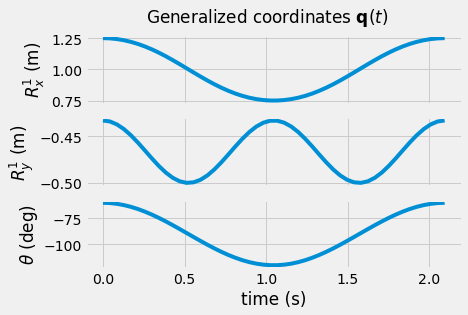

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(3)
fig.suptitle(r'Generalized coordinates $\mathbf{q}(t)$')
ax1.plot(t, q[0, :])
ax1.set_ylabel(r'$R^1_x$ (m)');
ax2.plot(t, q[1, :])
ax2.set_ylabel(r'$R^1_y$ (m)');
ax3.plot(t, q[2,:]*180/np.pi)
plt.xlabel('time (s)')
ax3.set_ylabel(r'$\theta$ (deg)')
for ax in fig.get_axes():
    ax.label_outer()

### Animate the result

In the next few blocks you will

1. set up a function to plot a 'link' shape based upon its generalized coordinate
2. initialize the lines and coordinate system
3. create your `init` and `animation` functions to update the lines on the plot
4. display the result in an HTML video

#### 1. Create function `plot_shape` to plot a 'link' shape 

In the next block, you define two shapes:
1. a link that has a length dimension and a generalized coordinate $\mathbf{q} = [R_x,~R_y,~\theta]$
2. a base that has a no dimensions and generalized coordinate $\mathbf{q} = [R_x,~R_y]$ _orientation is ignored_. 

You can reuse this function in other post-processing routines. 

In [7]:
def plot_shape(shape,dims,q):
    '''
    function to plot a shape based upon the shape dimensions and coordinates
    arguments:
    ----------
    shape: either 'link' or 'base',
            - the link returns two points to plot as a line
            - the base returns one point to plot as a marker
            - if neither 'link' or 'base' are chosen, then 0 is returned and warning printed 
            `choose a \'link\' or \'base\' please`
    dims: the dimensions of the shape
            - the link uses the first value as the length
            - the base ignores the `dims`
    q: generalized coordinates in the form [Rx, Ry, theta]
            - the link returns the center of the link at (Rx, Ry) and oriented at theta
            - the base returns the center at (Rx, Ry) and ignores theta
    returns:
    --------
    datax: coordinates to plot the x-positions
    datay: coordinates to plot the y-positions
            - the link returns array of length 2
            - the base returns array of length 1
    
    '''

    if shape=='link':
        Px=q[0]+np.array([dims[0]/2*np.cos(q[-1]),-dims[0]/2*np.cos(q[-1])])
        Py=q[1]+np.array([dims[0]/2*np.sin(q[-1]),-dims[0]/2*np.sin(q[-1])])
        datax = Px
        datay = Py
        #l,= plt.plot(Px,Py,'o-')
        return datax, datay
    elif shape=='base':
        Px=q[0]
        Py=q[1]
        data = [Px, Py]
        #l,=plt.plot(Px,Py,'s',markersize=20)
        return data
    else:
        print('choose a \'link\' or \'base\' please')
        return 0


#### 2. initialize the lines and coordinate system

Text(0.5, 1.0, 'Pendulum Motion and Path')

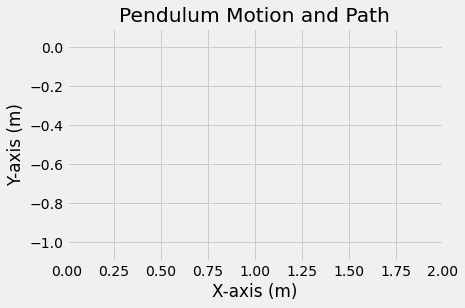

In [8]:
fig, ax = plt.subplots()
link, = ax.plot([], [], linewidth = 10)
marker, = ax.plot([], [], 'o', markersize = 20)
path, = ax.plot([], [])
ax.set_xlim((0, 2))
ax.set_ylim((-1.1, 0.1))
ax.set_xlabel('X-axis (m)')
ax.set_ylabel('Y-axis (m)')
ax.set_title('Pendulum Motion and Path')

#### 3. create your `init` and `animation` functions to update the lines on the plot
Create an initializing (`init`) function that clears the previous lines and markers

Create an animating (`animate`) function that updates the link, base, and path

In [9]:
def init():
    link.set_data([], [])
    marker.set_data([], [])
    path.set_data([], [])
    return (link, path,)

In [10]:
def animate(i):
    '''function that updates the line and marker data
    arguments:
    ----------
    i: index of timestep
    outputs:
    --------
    link: the line object plotted in the above ax.plot(...)
    path: the marker for the end of the 2-bar linkage plotted above with ax.plot('...','o')'''
    
    datax, datay = plot_shape('link', np.array([1]), q[:, i])
    link.set_data(datax, datay)
    pinx, piny = plot_shape('base', [], np.array([xa(t[i]), 0]))
    marker.set_data(pinx, piny)
    path.set_data(q[0, :i+1], q[1, :i+1])
    return (link, path, )

#### 4. display the result in an HTML video

Import the `animation` and `HTML` functions. Then, create an animation (`anim`) variable using the `animation.FuncAnimation`

In [11]:
from matplotlib import animation
from IPython.display import HTML

In [12]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=range(0,len(t)), interval=30, 
                               blit=True)

In [13]:
HTML(anim.to_html5_video())

## Wrapping up

In this notebook, you set up and solved a set of constraint equations, $\mathbf{C}(\mathbf{q},~t)$. The result is an array of generalized coordinates that change over time, but always satisfy a given set of constraints. 

Then, you post-processed this data by creating plots and an animation of the results. 